# Creating matrices for pairs of labels

## Which ones?

- Sequence-based ML model F1 scores
- Sequence similarity scores
- annotation similarity scores
- annotation overlap

## For which dataset?

- First for yeast because of conference

In [1]:
from subpred.util import load_df
import networkx as nx
import pandas as pd
from subpred.transmembrane_transporters import get_transmembrane_transporter_dataset

In [2]:
# TODO TransporterData class, with these parameters and the dataframes as fields
# TODO filter out IBA terms?
# TODO node degree and other terms
# TODO cleanup end
# TODO Explicitly filter out proteins that are part_of protein complexes? There seem to be some left in the dataset
# TODO feature selection, pca, kbest, multi-pssm

In [3]:
ORGANISM_IDS = {559292}
# ORGANISM_IDS = None
SWISSPROT_ONLY = False
MAX_SEQUENCE_EVIDENCE_CODE = 1
EXCLUDE_IEA_GO_TERMS = False
REMOVE_PROTEINS_WITHOUT_GENE_NAMES = True

In [4]:
df_sequences, df_uniprot_goa, df_go_chebi = get_transmembrane_transporter_dataset(
    organism_ids=ORGANISM_IDS,
    swissprot_only=SWISSPROT_ONLY,
    datasets_path="../data/datasets/",
    exclude_iea_go_terms=EXCLUDE_IEA_GO_TERMS,
    max_sequence_evidence_code=MAX_SEQUENCE_EVIDENCE_CODE,
    remove_proteins_without_gene_names=REMOVE_PROTEINS_WITHOUT_GENE_NAMES
)
display(df_sequences)
display(df_uniprot_goa)
display(df_go_chebi)

,sequence,reviewed,protein_existence,organism_id,protein_names
Uniprot,,,,,
P00401,MVQRWLYSTNAKDIAVLYFMLAIFSGMAGTAMSLIIRLELAAPGSQ...,True,1,559292,Cytochrome c oxidase subunit 1 (EC 7.1.1.9) (C...
P00830,MVLPRLYTATSRAAFKAAKQSAPLLSTSWKRCMASAAQSTPITGKV...,True,1,559292,"ATP synthase subunit beta, mitochondrial (EC 7..."
P04817,MTNSKEDADIEEKHMYNEPVTTLFHDVEASQTHHRRGSIPLKDEKS...,True,1,559292,Arginine permease CAN1 (Canavanine resistance ...
P07213,MKSFITRNKTAILATVAATGTAIGAYYYYNQLQQQQQRGKKNTINK...,True,1,559292,Mitochondrial import receptor subunit TOM70 (7...
P14906,MPTNYEYDEASETWPSFILTGLLMVVGPMTLLQIYQIFFGANAEDG...,True,1,559292,Protein translocation protein SEC63 (Protein N...
...,...,...,...,...,...
P39542,MFQQLSASIRHNAHIIFLCISWYFISSLASQVTKQVLTVCPLPLFL...,True,1,559292,Uncharacterized transporter YJL193W
Q05497,MAGILSKTLSEVHPSLRTNGMGIGNTHRRISLGFLPPNKKNPLVRK...,True,1,559292,Uncharacterized transporter YDR338C
P38318,MEPKRKSGSLAKHDLPQFYLLIMLYLAQGIPVGLAFGTVPFLLKSL...,True,1,559292,Uncharacterized membrane protein YBR220C


,Uniprot,qualifier,go_id,go_term,evidence_code,aspect,go_id_ancestor,go_term_ancestor
0,D6W196,enables,GO:0005347,ATP transmembrane transporter activity,IBA,F,GO:0015216,purine nucleotide transmembrane transporter ac...
1,D6W196,enables,GO:0005347,ATP transmembrane transporter activity,IBA,F,GO:0000295,adenine nucleotide transmembrane transporter a...
2,D6W196,enables,GO:0005347,ATP transmembrane transporter activity,IBA,F,GO:0022857,transmembrane transporter activity
3,D6W196,enables,GO:0005347,ATP transmembrane transporter activity,IBA,F,GO:0015215,nucleotide transmembrane transporter activity
4,D6W196,enables,GO:0005347,ATP transmembrane transporter activity,IBA,F,GO:0005347,ATP transmembrane transporter activity
...,...,...,...,...,...,...,...,...
7732,Q9ZZX1,enables,GO:0004129,cytochrome-c oxidase activity,IEA,F,GO:0022853,active monoatomic ion transmembrane transporte...
7733,Q9ZZX1,enables,GO:0004129,cytochrome-c oxidase activity,IEA,F,GO:0015078,proton transmembrane transporter activity
7734,Q9ZZX1,enables,GO:0004129,cytochrome-c oxidase activity,IEA,F,GO:0015399,primary active transmembrane transporter activity
7735,Q9ZZX1,enables,GO:0004129,cytochrome-c oxidase activity,IEA,F,GO:0015453,oxidoreduction-driven active transmembrane tra...


,go_id,go_term,chebi_id,chebi_term,chebi_go_relation
0,GO:0000064,L-ornithine transmembrane transporter activity,CHEBI:46911,L-ornithinium(1+),has_primary_input
1,GO:0000095,S-adenosyl-L-methionine transmembrane transpor...,CHEBI:59789,S-adenosyl-L-methionine zwitterion,has_primary_input
2,GO:0000099,sulfur amino acid transmembrane transporter ac...,CHEBI:26834,sulfur-containing amino acid,has_primary_input
3,GO:0000100,S-methylmethionine transmembrane transporter a...,CHEBI:58252,S-methyl-L-methionine zwitterion,has_primary_input
4,GO:0000102,L-methionine secondary active transmembrane tr...,CHEBI:57844,L-methionine zwitterion,has_primary_input
...,...,...,...,...,...
378,GO:1901682,sulfur compound transmembrane transporter acti...,CHEBI:26835,sulfur molecular entity,has_primary_input
379,GO:1902557,5'-adenylyl sulfate transmembrane transporter ...,CHEBI:58243,5'-adenylyl sulfate(2-),has_primary_input
380,GO:1903089,5-amino-1-ribofuranosylimidazole-4-carboxamide...,CHEBI:28498,acadesine,has_primary_input
381,GO:1903425,fluoride transmembrane transporter activity,CHEBI:17051,fluoride,has_primary_input


## Adjacency matrix

In [5]:
from subpred.adjacency_matrices import (
    get_chebi_adjacency_matrix,
    get_go_adjacency_matrix,
)

### GO adjacency

In [6]:
df_adj_matrix_go = get_go_adjacency_matrix(
    df_uniprot_goa=df_uniprot_goa, edges_filter={"is_a"}
)
df_adj_matrix_go

,GO:0000006,GO:0000007,GO:0000064,GO:0000095,GO:0000099,GO:0000100,GO:0000102,GO:0000295,GO:0000297,GO:0000319,...,GO:1901474,GO:1901505,GO:1901618,GO:1901680,GO:1901682,GO:1901702,GO:1902557,GO:1903089,GO:1903425,GO:1904680
GO:0000006,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
GO:0000007,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
GO:0000064,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
GO:0000095,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
GO:0000099,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GO:1901702,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
GO:1902557,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
GO:1903089,0,0,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0
GO:1903425,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


### ChEBI adjacency

In [7]:
df_adj_matrix_chebi = get_chebi_adjacency_matrix(
    df_go_chebi=df_go_chebi,
    edges_filter={"is_a"},
    primary_substrate_only=True,
)
df_adj_matrix_chebi

,CHEBI:13389,CHEBI:15354,CHEBI:15361,CHEBI:15377,CHEBI:15595,CHEBI:15676,CHEBI:15792,CHEBI:15927,CHEBI:16189,CHEBI:16199,...,CHEBI:61109,CHEBI:61292,CHEBI:61293,CHEBI:61336,CHEBI:63063,CHEBI:63299,CHEBI:64709,CHEBI:68452,CHEBI:77847,CHEBI:83821
CHEBI:13389,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
CHEBI:15354,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
CHEBI:15361,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
CHEBI:15377,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
CHEBI:15595,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CHEBI:63299,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
CHEBI:64709,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
CHEBI:68452,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
CHEBI:77847,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Chemical similarity

Here, we are using the morgan fingerprints. There are other options that might be better:


In [8]:
from subpred.chemical_similarity import get_pairwise_similarity, tanimoto_chebi_to_go

dict_tanimoto_matrices_chebi = {
    f"tanimoto_{method}": get_pairwise_similarity(
        df_go_chebi=df_go_chebi, fingerprint_method=method
    )
    for method in ["morgan", "atompairs", "torsions", "maccs"]
}

[12:13:13] WARNING: not removing hydrogen atom without neighbors
[12:13:17] WARNING: not removing hydrogen atom without neighbors
[12:13:21] WARNING: not removing hydrogen atom without neighbors
[12:13:24] WARNING: not removing hydrogen atom without neighbors


In [9]:
dict_tanimoto_matrices_go = {
    f"{matrix_name}_go_{agg_method}": tanimoto_chebi_to_go(
        df_tanimoto_chebi=df_tanimoto_chebi,
        df_go_chebi=df_go_chebi,
        agg_function=agg_method,
        primary_input_only=True,
    )
    for matrix_name, df_tanimoto_chebi in dict_tanimoto_matrices_chebi.items()
    for agg_method in ["mean", "median", "min", "max"]
}
dict_tanimoto_matrices_go

{'tanimoto_morgan_go_mean': go_id2      GO:0000064  GO:0000095  GO:0000100  GO:0000102  GO:0000297  \
 go_id1                                                                   
 GO:0000064    1.000000    0.218750    0.500000    0.500000    0.222222   
 GO:0000095    0.218750    1.000000    0.311475    0.230769    0.028986   
 GO:0000100    0.500000    0.311475    1.000000    0.517241    0.060606   
 GO:0000102    0.500000    0.230769    0.517241    1.000000    0.060606   
 GO:0000297    0.222222    0.028986    0.060606    0.060606    1.000000   
 ...                ...         ...         ...         ...         ...   
 GO:1901235    0.212121    0.130435    0.235294    0.235294    0.031250   
 GO:1901239    0.250000    0.096774    0.230769    0.230769    0.045455   
 GO:1902557    0.057143    0.493333    0.055556    0.055556    0.015152   
 GO:1903089    0.074074    0.352113    0.071429    0.071429    0.020000   
 GO:1903425    0.000000    0.000000    0.000000    0.000000    0.000000  

## Overlap Matrix

### GO

In [10]:
from subpred.overlap_matrix import get_go_overlap_matrix, plot_go_overlap_matrix

df_go_overlaps = get_go_overlap_matrix(
    df_uniprot_goa=df_uniprot_goa, exclude_iea=EXCLUDE_IEA_GO_TERMS
)
df_go_overlaps

go_id2,GO:0000006,GO:0000007,GO:0000064,GO:0000095,GO:0000099,GO:0000100,GO:0000102,GO:0000295,GO:0000297,GO:0000319,...,GO:1901474,GO:1901505,GO:1901618,GO:1901680,GO:1901682,GO:1901702,GO:1902557,GO:1903089,GO:1903425,GO:1904680
go_id1,,,,,,,,,,,,,,,,,,,,,
GO:0000006,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
GO:0000007,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
GO:0000064,0,0,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
GO:0000095,0,0,0,2,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
GO:0000099,0,0,0,0,3,0,1,0,0,0,...,0,0,0,1,3,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GO:1901702,1,1,0,0,0,0,0,8,0,1,...,3,8,3,0,9,72,0,0,2,0
GO:1902557,0,0,0,0,0,0,0,1,0,0,...,0,1,0,0,1,0,1,0,0,0
GO:1903089,0,0,0,0,0,0,0,0,0,0,...,2,2,0,0,1,0,0,2,0,0


In [11]:
# plot_go_overlap_matrix(df_go_overlaps=df_go_overlaps, df_uniprot_goa=df_uniprot_goa)

### ChEBI

In [12]:
from subpred.overlap_matrix import get_chebi_overlaps

df_chebi_overlaps = get_chebi_overlaps(
    df_go_chebi=df_go_chebi,
    df_uniprot_goa=df_uniprot_goa,
    exclude_iea=EXCLUDE_IEA_GO_TERMS,
    primary_input_only=True,
)
df_chebi_overlaps

,CHEBI:13389,CHEBI:15354,CHEBI:15361,CHEBI:15377,CHEBI:15595,CHEBI:15676,CHEBI:15792,CHEBI:15927,CHEBI:16189,CHEBI:16199,...,CHEBI:61109,CHEBI:61292,CHEBI:61293,CHEBI:61336,CHEBI:63063,CHEBI:63299,CHEBI:64709,CHEBI:68452,CHEBI:77847,CHEBI:83821
CHEBI:13389,2,0,1,0,0,0,0,0,0,0,...,0,0,2,0,0,0,1,0,0,0
CHEBI:15354,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
CHEBI:15361,1,0,4,0,0,0,0,0,0,0,...,0,0,1,0,0,0,4,0,0,0
CHEBI:15377,0,0,0,4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
CHEBI:15595,0,0,0,0,1,0,0,0,1,0,...,0,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CHEBI:63299,0,0,0,0,0,0,0,2,0,0,...,2,0,10,2,0,25,3,2,1,0
CHEBI:64709,1,0,4,0,1,0,1,0,2,0,...,0,0,3,6,2,3,65,3,0,5
CHEBI:68452,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,2,3,8,0,2
CHEBI:77847,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0


## GO Semantic Similarity Matrix


In [13]:
from subpred.go_semantic_similarity import get_go_semantic_similarities

df_semantic_similarity_wang = get_go_semantic_similarities(  # TODO tcss cutoff?
    aspect="F",
    organism_ids=ORGANISM_IDS,
    go_id_subset=df_uniprot_goa.go_id_ancestor.unique(),  # Transporters
    method="Wang",  # "Resnik", "Lin", "Rel", "Jiang", "TCSS" and "Wang"
    conversion_method="internal",
    parallelization_method="multicore",
)
df_semantic_similarity_wang

R[write to console]: Error in (function ()  : 
  org.Sc.sgdPFAM is defunct. Please use select() if you need access to
  PFAM or PROSITE accessions.

/home/andy/mambaforge/envs/subpred4/lib/python3.10/site-packages/rpy2/robjects/packages.py:263: UserWarning: R C-API Rf_findVarInFrame()
  warn(str(rre))
R[write to console]: preparing gene to GO mapping data...



,GO:0000006,GO:0000007,GO:0000064,GO:0000095,GO:0000099,GO:0000100,GO:0000102,GO:0000295,GO:0000297,GO:0000319,...,GO:1901474,GO:1901505,GO:1901618,GO:1901680,GO:1901682,GO:1901702,GO:1902557,GO:1903089,GO:1903425,GO:1904680
GO:0000006,1.000,0.713,0.300,0.330,0.233,0.267,0.166,0.114,0.326,0.267,...,0.252,0.252,0.377,0.205,0.351,0.349,0.191,0.211,0.293,0.260
GO:0000007,0.713,1.000,0.300,0.330,0.233,0.267,0.166,0.114,0.326,0.267,...,0.252,0.252,0.377,0.205,0.351,0.349,0.191,0.211,0.293,0.260
GO:0000064,0.300,0.300,1.000,0.471,0.565,0.381,0.538,0.247,0.473,0.381,...,0.404,0.404,0.488,0.450,0.310,0.518,0.394,0.326,0.408,0.395
GO:0000095,0.330,0.330,0.471,1.000,0.520,0.588,0.366,0.265,0.495,0.588,...,0.446,0.446,0.564,0.423,0.609,0.548,0.439,0.350,0.475,0.431
GO:0000099,0.233,0.233,0.565,0.520,1.000,0.548,0.543,0.217,0.321,0.548,...,0.396,0.396,0.521,0.755,0.616,0.364,0.408,0.310,0.430,0.387
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GO:1901702,0.349,0.349,0.518,0.548,0.364,0.434,0.311,0.363,0.653,0.434,...,0.590,0.590,0.553,0.318,0.284,1.000,0.311,0.445,0.475,0.553
GO:1902557,0.191,0.191,0.394,0.439,0.408,0.457,0.320,0.636,0.281,0.457,...,0.332,0.472,0.433,0.344,0.451,0.311,1.000,0.369,0.362,0.331
GO:1903089,0.211,0.211,0.326,0.350,0.310,0.368,0.208,0.301,0.398,0.368,...,0.698,0.698,0.465,0.278,0.276,0.445,0.369,1.000,0.398,0.621
GO:1903425,0.293,0.293,0.408,0.475,0.430,0.503,0.258,0.308,0.419,0.673,...,0.525,0.525,0.651,0.358,0.460,0.475,0.362,0.398,1.000,0.497


## Pairwise ML models

- find label combinations with enough samples

In [14]:
from subpred.go_prediction import (
    get_model_evaluation_matrix_parallel,
    process_pairwise_eval_results,
    plot_results_as_heatmap,
)

pairwise_eval_results = get_model_evaluation_matrix_parallel(
    df_sequences,
    df_uniprot_goa,
    exclude_iea=EXCLUDE_IEA_GO_TERMS,
    standardize_samples=True,
    multi_output=True,
    min_samples_per_class=20,
    min_unique_samples_per_class=20,
    model_name="svc_multi",
    n_jobs=-1,
)

df_train_results, df_test_results = process_pairwise_eval_results(
    pairwise_eval_results=pairwise_eval_results,
    df_uniprot_goa=df_uniprot_goa,
    convert_go_ids_to_terms=False,
)
# TODO graph with sample stats: y axis number of models, x axis samples per class, multi vs single
# TODO feature selection/pca on tera improved scores by quite a bit
# TODO with feature combinator
# TODO pca fewer steps

In [15]:
SHOW_PLOTS = 0
if SHOW_PLOTS:
    plot_results_as_heatmap(
        df_train_results,
        title="average grid search test scores for each label across CV folds",
    )
    plot_results_as_heatmap(
        df_train_results,
        title="average grid search test scores for each label across CV folds, sorted",
        sort=True,
    )
    plot_results_as_heatmap(
        df_test_results,
        title="average independent test set scores for each label across CV folds",
    )
    plot_results_as_heatmap(
        df_test_results,
        title="average independent test set scores for each label across CV folds, sorted",
        sort=True,
    )

## Pairwise sequence sim matrix

In [16]:
from subpred.sequence_identity import (
    get_pairwise_alignment_scores,
    get_aggregated_sequence_alignments_go,
)

df_protein_identity, df_protein_alignment_scores = get_pairwise_alignment_scores(
    df_sequences=df_sequences,
    df_uniprot_goa=df_uniprot_goa,
    exclude_iea=EXCLUDE_IEA_GO_TERMS,
)

In [17]:
dict_pairwise_alignment_scores = dict()
# TODO why does this take so long?
for score_name, score_matrix in zip(
    ["identity", "alignment_score"],
    [df_protein_identity, df_protein_alignment_scores],
):
    for aggr_method in [
        "median",
        "mean",
        "max",
        "min",
    ]:
        dict_pairwise_alignment_scores[
            f"go_{aggr_method}_sequence_{score_name}"
        ] = get_aggregated_sequence_alignments_go(
            df_uniprot_goa=df_uniprot_goa,
            df_protein_scores=score_matrix,
            exclude_iea=EXCLUDE_IEA_GO_TERMS,
            aggr_method=aggr_method,
        )

In [18]:
dict_pairwise_alignment_scores

{'go_median_sequence_identity': go_id2      GO:0000006  GO:0000007  GO:0000064  GO:0000095  GO:0000099  \
 go_id1                                                                   
 GO:0000006  100.000000   35.267857   15.094340   16.698890   15.679443   
 GO:0000007   35.267857  100.000000   15.165877   13.832989   14.259598   
 GO:0000064   15.094340   15.165877   64.133739   17.578321   14.312618   
 GO:0000095   16.698890   13.832989   17.578321   55.792164   15.178456   
 GO:0000099   15.679443   14.259598   14.312618   15.178456   25.557461   
 ...                ...         ...         ...         ...         ...   
 GO:1901702   14.010193   13.931624   13.256484   13.632492   14.231854   
 GO:1902557   17.021277   14.014252   23.170732   18.137275   14.368932   
 GO:1903089   13.189242   14.046823   13.283427   12.913422   14.749902   
 GO:1903425   11.286089   13.679245   14.870157   12.627995   15.254237   
 GO:1904680   13.065977   13.659359   12.500000   12.598657   14.8214

## Comparisons

### Datasets

- GO terms that are directly related vs. not
- GO terms that have a common parent vs. not
- GO terms that have a common ancestor vs. not (need to set depth limit, otherwise they all do)
- GO terms that a tanimoto coefficient above 0.5 (or other threshold) vs. below
- GO terms with max/median sequence identity

### Comparisons

- SVM scores
- Sequence identities (max, median)
- Overlaps in protein annotation
- Overlaps in chebi annotation

### Other ideas:

- Compare different ways to divide the transporter GO tree
- One of the scores on y axis, the rest in violin plot
    - Violin plots or similar

In [19]:
# Dataframes: for parameters:
# ORGANISM_IDS={559292}
# SWISSPROT_ONLY=False
# MAX_SEQUENCE_EVIDENCE_CODE = 1
# EXCLUDE_IEA_GO_TERMS=False

# TODO ChemSim: which fingerprint for similarity method?
# TODO ChemSim: filter other chebi dfs for those with valid fingerprint? Should remove abstract terms.
# TODO SemSim: which semantic similarity method? wang is fastest, tcss also fast
# TODO SeqSim: measures other than identity and median?
# TODO ML: min samples per class? Min unique samples?
# TODO ML: Feature selection and/or PCA?
# TODO ML: analysis with and without IEA terms?
# TODO compare scores inside of df to scores in entire df. for example, the max median sequence similatity here is 14, but in the overall df it is 100.

df_sequences  #  332 x   5
df_uniprot_goa  # 7737 x   8, 211 direct annot, 288 with ancestors
df_go_chebi  #  384 x   5, primary substrate chebi terms: 159

df_adj_matrix_go  #  288 x 288
df_go_overlaps  #  288 x 288
df_semantic_similarity_wang  #  288 x 288

dict_pairwise_alignment_scores  #  288 x 288

dict_tanimoto_matrices_go  #  131 x 131

df_adj_matrix_chebi  #  159 x 159
df_chebi_overlaps  #  159 x 159
dict_tanimoto_matrices_chebi  #   89 x  89

df_train_results  #   36 x  36, sparse, asymetrical
df_test_results  #   36 x  36, sparse, asymetrical
pass

# TODO more matrices, generated with different parameters. max, min, mean, needleman-wunsch score, evaluation with PCA, common parent,...

In [20]:
print("unique proteins:", df_sequences.index.unique().shape[0])
print("unique directly annotated go terms:", df_uniprot_goa.go_id.unique().shape[0])
print("unique annotated go terms:", df_uniprot_goa.go_id_ancestor.unique().shape[0])
print("GO terms annotated with ChEBI terms", df_go_chebi.go_id.unique().shape[0])
print("Unique ChEBI terms", df_go_chebi.chebi_id.unique().shape[0])
print(
    "Unique ChEBI terms usable for Tanimoto:",
    dict_tanimoto_matrices_chebi["tanimoto_atompairs"].index.unique().shape[0],
)

unique proteins: 332
unique directly annotated go terms: 211
unique annotated go terms: 288
GO terms annotated with ChEBI terms 225
Unique ChEBI terms 181
Unique ChEBI terms usable for Tanimoto: 89


### What determines good classification performance?

In [21]:
def get_sparse_matrix(df_ml_results, dataset_name: str, mean: bool = True):
    df_ml_results_sparse = df_ml_results.T.unstack().reset_index(
        name=f"{dataset_name}_score"
    )
    df_ml_results_sparse = df_ml_results_sparse[
        ~df_ml_results_sparse[f"{dataset_name}_score"].isnull()
    ].reset_index(drop=True)
    if mean:
        df_ml_results_sparse = (
            pd.DataFrame(
                [
                    sorted([go_pos, go_neg]) + [score]
                    for go_pos, go_neg, score in df_ml_results_sparse.values
                ],
                columns=["go_id1", "go_id2", f"mean_{dataset_name}_score"],
            )
            .groupby(["go_id1", "go_id2"])
            .agg("mean")
            .reset_index()
        )

    return df_ml_results_sparse

In [22]:
df_test_results_sparse = get_sparse_matrix(df_test_results, "test", mean=True)
df_train_results_sparse = get_sparse_matrix(df_train_results, "train", mean=True)

df_matrices_long = pd.merge(df_train_results_sparse, df_test_results_sparse)
df_matrices_long

,go_id1,go_id2,mean_train_score,mean_test_score
0,GO:0005342,GO:0005351,0.941997,0.964021
1,GO:0005342,GO:0005402,0.941997,0.964021
2,GO:0005342,GO:0008320,0.854080,0.898498
3,GO:0005342,GO:0008324,0.852725,0.872813
4,GO:0005342,GO:0015075,0.843743,0.865034
...,...,...,...,...
399,GO:0046915,GO:0046943,0.851790,0.857055
400,GO:0046915,GO:1901505,0.878210,0.871181
401,GO:0046943,GO:1901505,0.695376,0.724726
402,GO:0046943,GO:1901702,0.875697,0.886486


In [23]:
go_term_to_sample_count = df_uniprot_goa[["go_id_ancestor", "Uniprot"]].drop_duplicates().groupby("go_id_ancestor").apply(len).to_dict()
df_matrices_long["class1_n_samples"] = df_matrices_long.go_id1.map(go_term_to_sample_count)
df_matrices_long["class2_n_samples"] = df_matrices_long.go_id2.map(go_term_to_sample_count)

In [24]:
df_matrices_long

,go_id1,go_id2,mean_train_score,mean_test_score,class1_n_samples,class2_n_samples
0,GO:0005342,GO:0005351,0.941997,0.964021,65,22
1,GO:0005342,GO:0005402,0.941997,0.964021,65,22
2,GO:0005342,GO:0008320,0.854080,0.898498,65,21
3,GO:0005342,GO:0008324,0.852725,0.872813,65,131
4,GO:0005342,GO:0015075,0.843743,0.865034,65,142
...,...,...,...,...,...,...
399,GO:0046915,GO:0046943,0.851790,0.857055,29,64
400,GO:0046915,GO:1901505,0.878210,0.871181,29,25
401,GO:0046943,GO:1901505,0.695376,0.724726,64,25
402,GO:0046943,GO:1901702,0.875697,0.886486,64,72


In [25]:
df_matrices_long["overlap"] = df_matrices_long.apply(
    lambda row: df_go_overlaps.at[row.go_id1, row.go_id2], axis=1
)
df_matrices_long["semantic_sim_wang"] = df_matrices_long.apply(
    lambda row: df_semantic_similarity_wang.at[row.go_id1, row.go_id2], axis=1
)

for matrix_name, alignment_score_matrix in dict_pairwise_alignment_scores.items():
    df_matrices_long[matrix_name] = df_matrices_long.apply(
        lambda row: alignment_score_matrix.at[row.go_id1, row.go_id2], axis=1
    )

# TODO very similar scores?
# df_test_results_sparse["median_tanimoto_score"] = df_test_results_sparse.apply(
#     lambda row: df_tanimoto_go.at[row.neg_label, row.pos_label], axis=1
# )

#### node degree

In [26]:
network_go = load_df("go_obo")
labels_count_dict = (
    df_uniprot_goa[["go_id_ancestor", "Uniprot"]]
    .drop_duplicates()
    .groupby("go_id_ancestor")
    .apply(len)
    .to_dict()
)
# labels_count_dict = {k:v for k,v in labels_count_dict.items() if v >= MIN_COUNT}
network_go = network_go.subgraph(nodes=labels_count_dict.keys())

network_go = network_go.edge_subgraph(
    [(a, b, k) for a, b, k in network_go.edges(keys=True) if k == "is_a"]
)

df_matrices_long["class1_degree"] = df_matrices_long.go_id1.apply(lambda x: network_go.degree(x))
df_matrices_long["class2_degree"] = df_matrices_long.go_id2.apply(lambda x: network_go.degree(x))
df_matrices_long["class1_indegree"] = df_matrices_long.go_id1.apply(lambda x: network_go.in_degree(x))
df_matrices_long["class2_indegree"] = df_matrices_long.go_id2.apply(lambda x: network_go.in_degree(x))
df_matrices_long["class1_outdegree"] = df_matrices_long.go_id1.apply(lambda x: network_go.out_degree(x))
df_matrices_long["class2_outdegree"] = df_matrices_long.go_id2.apply(lambda x: network_go.out_degree(x))


In [27]:
df_matrices_long

,go_id1,go_id2,mean_train_score,mean_test_score,class1_n_samples,class2_n_samples,overlap,semantic_sim_wang,go_median_sequence_identity,go_mean_sequence_identity,...,go_median_sequence_alignment_score,go_mean_sequence_alignment_score,go_max_sequence_alignment_score,go_min_sequence_alignment_score,class1_degree,class2_degree,class1_indegree,class2_indegree,class1_outdegree,class2_outdegree
0,GO:0005342,GO:0005351,0.941997,0.964021,65,22,0,0.297,13.993389,13.668233,...,-629.5,-901.413986,-206.0,-4255.0,3,3,2,1,1,2
1,GO:0005342,GO:0005402,0.941997,0.964021,65,22,0,0.346,13.993389,13.668233,...,-629.5,-901.413986,-206.0,-4255.0,3,3,2,1,1,2
2,GO:0005342,GO:0008320,0.854080,0.898498,65,21,0,0.463,13.265306,12.578896,...,-794.0,-1108.408791,-104.0,-6253.0,3,2,2,1,1,1
3,GO:0005342,GO:0008324,0.852725,0.872813,65,131,4,0.527,13.333333,12.665351,...,-969.0,-1327.227951,7922.0,-7517.0,3,6,2,5,1,1
4,GO:0005342,GO:0015075,0.843743,0.865034,65,142,5,0.689,13.363794,12.715393,...,-986.0,-1329.123835,7922.0,-7517.0,3,5,2,4,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399,GO:0046915,GO:0046943,0.851790,0.857055,29,64,2,0.406,13.467174,13.202828,...,-845.0,-1327.112069,7922.0,-5749.0,7,10,6,8,1,2
400,GO:0046915,GO:1901505,0.878210,0.871181,29,25,0,0.305,13.605442,13.404514,...,-746.0,-1185.155862,111.0,-4838.0,7,8,6,7,1,1
401,GO:0046943,GO:1901505,0.695376,0.724726,64,25,3,0.531,14.119762,14.297311,...,-715.0,-883.306250,3243.0,-5229.0,10,8,8,7,2,1
402,GO:0046943,GO:1901702,0.875697,0.886486,64,72,18,0.484,13.711987,13.730713,...,-947.0,-1235.669271,3651.0,-7517.0,10,26,8,25,2,1


In [28]:
for name, df_tanimoto_go in dict_tanimoto_matrices_go.items():
    df_matrices_long = df_matrices_long.merge(
        df_tanimoto_go.unstack().reset_index(name=name),
        how="left",
        on=["go_id1", "go_id2"],
    )

In [29]:
df_matrices_long

,go_id1,go_id2,mean_train_score,mean_test_score,class1_n_samples,class2_n_samples,overlap,semantic_sim_wang,go_median_sequence_identity,go_mean_sequence_identity,...,tanimoto_atompairs_go_min,tanimoto_atompairs_go_max,tanimoto_torsions_go_mean,tanimoto_torsions_go_median,tanimoto_torsions_go_min,tanimoto_torsions_go_max,tanimoto_maccs_go_mean,tanimoto_maccs_go_median,tanimoto_maccs_go_min,tanimoto_maccs_go_max
0,GO:0005342,GO:0005351,0.941997,0.964021,65,22,0,0.297,13.993389,13.668233,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,GO:0005342,GO:0005402,0.941997,0.964021,65,22,0,0.346,13.993389,13.668233,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,GO:0005342,GO:0008320,0.854080,0.898498,65,21,0,0.463,13.265306,12.578896,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,GO:0005342,GO:0008324,0.852725,0.872813,65,131,4,0.527,13.333333,12.665351,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,GO:0005342,GO:0015075,0.843743,0.865034,65,142,5,0.689,13.363794,12.715393,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399,GO:0046915,GO:0046943,0.851790,0.857055,29,64,2,0.406,13.467174,13.202828,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
400,GO:0046915,GO:1901505,0.878210,0.871181,29,25,0,0.305,13.605442,13.404514,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
401,GO:0046943,GO:1901505,0.695376,0.724726,64,25,3,0.531,14.119762,14.297311,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
402,GO:0046943,GO:1901702,0.875697,0.886486,64,72,18,0.484,13.711987,13.730713,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
def write_markdown_table(df, filename):
    with open(filename, "w") as file:
        file.write(df.to_markdown())

### Stats

In [31]:
print(df_matrices_long.describe().T.round(2).to_markdown())

|                                    |   count |     mean |     std |      min |      25% |      50% |      75% |      max |
|:-----------------------------------|--------:|---------:|--------:|---------:|---------:|---------:|---------:|---------:|
| mean_train_score                   |     404 |     0.86 |    0.09 |     0.52 |     0.82 |     0.87 |     0.93 |     0.98 |
| mean_test_score                    |     404 |     0.87 |    0.09 |     0.54 |     0.83 |     0.89 |     0.94 |     0.99 |
| class1_n_samples                   |     404 |    52.05 |   37.6  |    21    |    22    |    33    |    78    |   158    |
| class2_n_samples                   |     404 |    48.78 |   33.11 |    21    |    25    |    32    |    64    |   158    |
| overlap                            |     404 |     4.86 |   11.82 |     0    |     0    |     0    |     3.25 |    89    |
| semantic_sim_wang                  |     404 |     0.37 |    0.13 |     0.13 |     0.27 |     0.35 |     0.45 |     0.74 |


In [32]:
write_markdown_table(
    df_matrices_long.describe().round(2).iloc[:, :4],
    "../reports/03_matrices/describe.md",
)

How many chebi terms have fingerprint?

In [33]:
print(
    dict_tanimoto_matrices_chebi["tanimoto_morgan"].shape[0],
    df_go_chebi.chebi_id.unique().shape[0],
)

89 181


<Axes: >

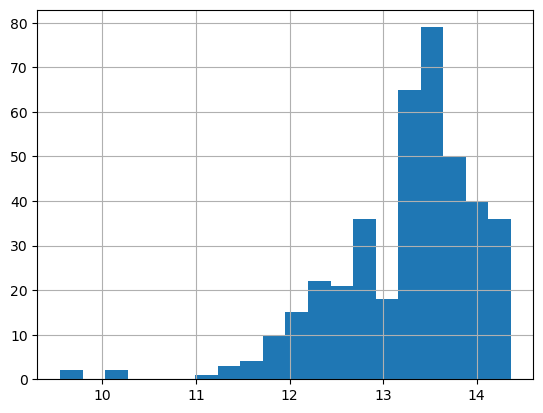

In [34]:
df_matrices_long.go_median_sequence_identity.hist(bins=20)

### Correlation

In [35]:
df_matrices_long_pearson = df_matrices_long.drop(["go_id1", "go_id2"], axis=1).corr(
    method="pearson"
)
df_matrices_long_pearson.columns = df_matrices_long_pearson.columns.to_series().apply(
    lambda s: s.replace("mean", "f1").replace("score", "") + "pearson"
)

df_matrices_long_kendall = df_matrices_long.drop(["go_id1", "go_id2"], axis=1).corr(
    method="kendall"
)
df_matrices_long_kendall.columns = df_matrices_long_kendall.columns.to_series().apply(
    lambda s: s.replace("mean", "f1").replace("score", "") + "kendall"
)

print(
    pd.concat(
        [df_matrices_long_pearson.iloc[:, :2], df_matrices_long_kendall.iloc[:, :2]],
        axis=1,
    )
    .round(3)
    .to_markdown()
)

|                                    |   f1_train_pearson |   f1_test_pearson |   f1_train_kendall |   f1_test_kendall |
|:-----------------------------------|-------------------:|------------------:|-------------------:|------------------:|
| mean_train_score                   |              1     |             0.971 |              1     |             0.856 |
| mean_test_score                    |              0.971 |             1     |              0.856 |             1     |
| class1_n_samples                   |             -0.282 |            -0.249 |             -0.214 |            -0.191 |
| class2_n_samples                   |             -0.24  |            -0.23  |             -0.137 |            -0.126 |
| overlap                            |             -0.029 |            -0.047 |             -0.281 |            -0.284 |
| semantic_sim_wang                  |             -0.282 |            -0.257 |             -0.232 |            -0.214 |
| go_median_sequence_identity   

### Scatter plots

In [36]:
import seaborn as sns

df_matrices_long_hue = pd.concat(
    [
        df_matrices_long.rename(columns={"mean_train_score": "mean_f1_score"})
        .drop("mean_test_score", axis=1)
        .assign(dataset="train"),
        df_matrices_long.rename(columns={"mean_test_score": "mean_f1_score"})
        .drop("mean_train_score", axis=1)
        .assign(dataset="test"),
    ]
)

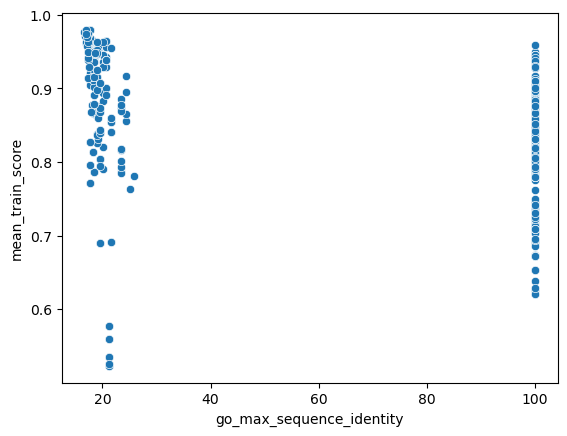

In [37]:
sns.scatterplot(
    data=df_matrices_long,
    x="go_max_sequence_identity",
    y="mean_train_score",
).get_figure().savefig("../reports/03_matrices/max_ident_mean_train_scatter.png")

In [38]:
df_matrices_long_numeric = df_matrices_long[
    df_matrices_long.columns[~df_matrices_long.columns.isin(["go_id1", "go_id2"])]
]

In [39]:
df_matrices_long_numeric[df_matrices_long_numeric.go_max_sequence_identity < 99].corr(
    method="kendall"
).round(3)

,mean_train_score,mean_test_score,class1_n_samples,class2_n_samples,overlap,semantic_sim_wang,go_median_sequence_identity,go_mean_sequence_identity,go_max_sequence_identity,go_min_sequence_identity,...,tanimoto_atompairs_go_min,tanimoto_atompairs_go_max,tanimoto_torsions_go_mean,tanimoto_torsions_go_median,tanimoto_torsions_go_min,tanimoto_torsions_go_max,tanimoto_maccs_go_mean,tanimoto_maccs_go_median,tanimoto_maccs_go_min,tanimoto_maccs_go_max
mean_train_score,1.000,0.839,-0.021,-0.084,NaN,-0.272,-0.049,0.008,-0.412,0.315,...,NaN,NaN,0.236,0.236,0.236,0.236,0.236,0.236,0.236,0.236
mean_test_score,0.839,1.000,0.017,-0.058,NaN,-0.271,-0.064,-0.001,-0.368,0.312,...,NaN,NaN,0.707,0.707,0.707,0.707,0.707,0.707,0.707,0.707
class1_n_samples,-0.021,0.017,1.000,-0.255,NaN,0.102,-0.066,-0.046,-0.023,-0.061,...,NaN,NaN,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
class2_n_samples,-0.084,-0.058,-0.255,1.000,NaN,0.025,-0.005,-0.002,0.138,-0.057,...,NaN,NaN,0.775,0.775,0.775,0.775,0.775,0.775,0.775,0.775
overlap,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
semantic_sim_wang,-0.272,-0.271,0.102,0.025,NaN,1.000,0.196,0.144,0.268,-0.101,...,NaN,NaN,0.236,0.236,0.236,0.236,0.236,0.236,0.236,0.236
go_median_sequence_identity,-0.049,-0.064,-0.066,-0.005,NaN,0.196,1.000,0.846,0.169,0.334,...,NaN,NaN,-0.236,-0.236,-0.236,-0.236,-0.236,-0.236,-0.236,-0.236
go_mean_sequence_identity,0.008,-0.001,-0.046,-0.002,NaN,0.144,0.846,1.000,0.148,0.471,...,NaN,NaN,-0.236,-0.236,-0.236,-0.236,-0.236,-0.236,-0.236,-0.236
go_max_sequence_identity,-0.412,-0.368,-0.023,0.138,NaN,0.268,0.169,0.148,1.000,-0.105,...,NaN,NaN,-0.236,-0.236,-0.236,-0.236,-0.236,-0.236,-0.236,-0.236
go_min_sequence_identity,0.315,0.312,-0.061,-0.057,NaN,-0.101,0.334,0.471,-0.105,1.000,...,NaN,NaN,-0.258,-0.258,-0.258,-0.258,-0.258,-0.258,-0.258,-0.258


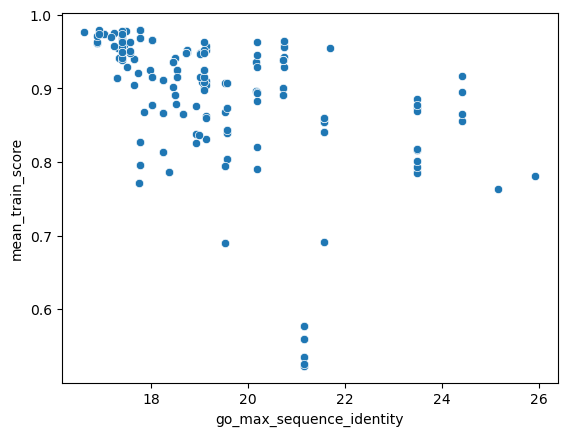

In [40]:
sns.scatterplot(
    df_matrices_long[df_matrices_long.go_max_sequence_identity < 99],
    y="mean_train_score",
    x="go_max_sequence_identity",
).get_figure().savefig("../reports/03_matrices/max_ident_mean_train_scatter_no100.png")

In [41]:
go_to_name = {k: v for k, v in load_df("go_obo").nodes(data="name")}

What are the lowest-performing pairs in this plot?

In [42]:
tmp = df_matrices_long[
    (df_matrices_long.go_max_sequence_identity < 99)
    & (df_matrices_long.mean_train_score < 0.7)
]

print(
    pd.concat(
        [tmp.go_id1.map(go_to_name), tmp.go_id2.map(go_to_name), tmp.mean_train_score],
        axis=1,
    )
    .round(3)
    .sort_values("mean_train_score")
    .to_markdown(index=False)
)

| go_id1                                                        | go_id2                                                        |   mean_train_score |
|:--------------------------------------------------------------|:--------------------------------------------------------------|-------------------:|
| protein transmembrane transporter activity                    | monoatomic ion transmembrane transporter activity             |              0.523 |
| monoatomic ion transmembrane transporter activity             | macromolecule transmembrane transporter activity              |              0.523 |
| macromolecule transmembrane transporter activity              | inorganic cation transmembrane transporter activity           |              0.526 |
| protein transmembrane transporter activity                    | inorganic cation transmembrane transporter activity           |              0.526 |
| protein transmembrane transporter activity                    | inorganic molecular entity t

In [43]:
tmp = pd.concat(
    [df_matrices_long.go_id1.map(go_to_name), df_matrices_long.go_id2.map(go_to_name)],
    axis=1,
)
print(
    tmp[
        (tmp.go_id1 == "protein transmembrane transporter activity")
        | (tmp.go_id2 == "protein transmembrane transporter activity")
    ].shape[0]
)
print(
    tmp[
        (tmp.go_id1 == "macromolecule transmembrane transporter activity")
        | (tmp.go_id2 == "macromolecule transmembrane transporter activity")
    ].shape[0]
)

31
31


#### Min identity

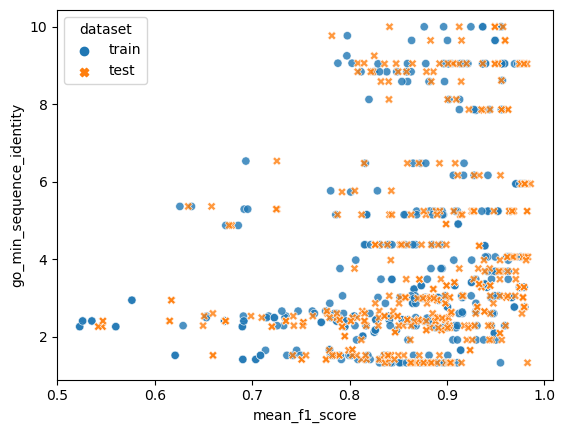

In [44]:
import seaborn as sns

sns.scatterplot(
    data=df_matrices_long_hue,
    x="mean_f1_score",
    y="go_min_sequence_identity",
    hue="dataset",
    style="dataset",
    alpha=0.8,
).get_figure().savefig("../reports/03_matrices/min_ident_mean_train_scatter.png")

### Median identity

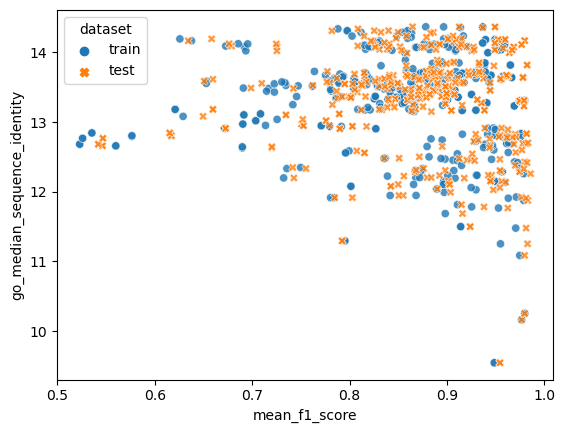

In [45]:
import seaborn as sns

sns.scatterplot(
    data=df_matrices_long_hue,
    x="mean_f1_score",
    y="go_median_sequence_identity",
    hue="dataset",
    style="dataset",
    alpha=0.8,
).get_figure().savefig("../reports/03_matrices/median_ident_mean_train_scatter.png")

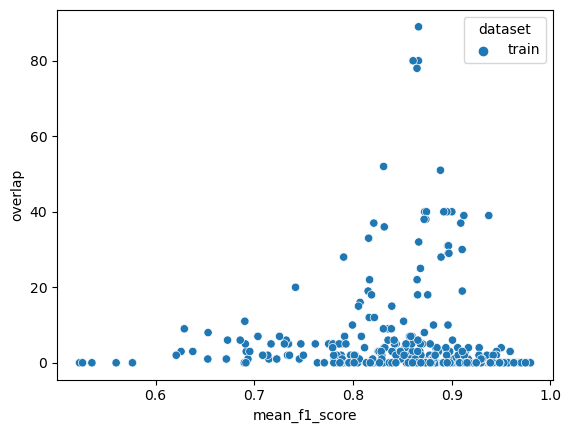

In [46]:
import seaborn as sns

sns.scatterplot(
    data=df_matrices_long_hue[df_matrices_long_hue.dataset == "train"],
    x="mean_f1_score",
    y="overlap",
    hue="dataset",
    style="dataset",
).get_figure().savefig("../reports/03_matrices/overlap_ident_mean_train_scatter.png")

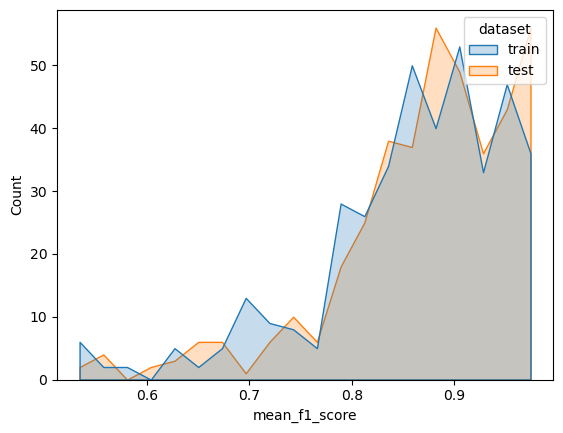

In [47]:
sns.histplot(
    df_matrices_long_hue, x="mean_f1_score", hue="dataset", element="poly"
).get_figure().savefig("../reports/03_matrices/ml_scores_dist.png")

### Top 10, low 10

In [48]:
df_matrices_long_low10 = df_matrices_long.sort_values("mean_train_score").iloc[
    :10,
    :10,
]

In [49]:
print(df_matrices_long_low10.assign(
    go_id1=df_matrices_long_low10.go_id1.map(go_to_name)
).assign(go_id2=df_matrices_long_low10.go_id2.map(go_to_name)).round(3).to_markdown(index=False))

| go_id1                                                        | go_id2                                                        |   mean_train_score |   mean_test_score |   class1_n_samples |   class2_n_samples |   overlap |   semantic_sim_wang |   go_median_sequence_identity |   go_mean_sequence_identity |
|:--------------------------------------------------------------|:--------------------------------------------------------------|-------------------:|------------------:|-------------------:|-------------------:|----------:|--------------------:|------------------------------:|----------------------------:|
| protein transmembrane transporter activity                    | monoatomic ion transmembrane transporter activity             |              0.523 |             0.542 |                 21 |                142 |         0 |               0.498 |                        12.681 |                      11.896 |
| monoatomic ion transmembrane transporter activity             | macromo

In [50]:
df_matrices_long_top10 =df_matrices_long.sort_values("mean_train_score", ascending=False).iloc[
    :10,
    :10,
]

In [51]:
print(df_matrices_long_top10.assign(
    go_id1=df_matrices_long_top10.go_id1.map(go_to_name)
).assign(go_id2=df_matrices_long_top10.go_id2.map(go_to_name)).round(3).to_markdown(index=False))

| go_id1                                                            | go_id2                                            |   mean_train_score |   mean_test_score |   class1_n_samples |   class2_n_samples |   overlap |   semantic_sim_wang |   go_median_sequence_identity |   go_mean_sequence_identity |
|:------------------------------------------------------------------|:--------------------------------------------------|-------------------:|------------------:|-------------------:|-------------------:|----------:|--------------------:|------------------------------:|----------------------------:|
| symporter activity                                                | macromolecule transmembrane transporter activity  |              0.98  |             0.98  |                 38 |                 21 |         0 |               0.255 |                        13.309 |                      12.499 |
| protein transmembrane transporter activity                        | symporter activity         

## Plots for presentation

In [52]:
import networkx as nx
import matplotlib.pyplot as plt

def graph_plot(df_uniprot_goa:pd.DataFrame, min_samples_per_term:int=0, method:str="labels"):
    network_go = load_df("go_obo")
    go_to_name = {k: v for k, v in network_go.nodes(data="name")}
    labels_count_dict = (
        df_uniprot_goa[["go_id_ancestor", "Uniprot"]]
        .drop_duplicates()
        .groupby("go_id_ancestor")
        .apply(len)
        .to_dict()
    )
    labels_count_dict = {k:v for k,v in labels_count_dict.items() if v >= min_samples_per_term}
    network_go = network_go.subgraph(nodes=labels_count_dict.keys())

    network_go = network_go.edge_subgraph(
        [(a, b, k) for a, b, k in network_go.edges(keys=True) if k == "is_a"]
    )
    name_to_go = {v: k for k, v in go_to_name.items()}
    plt.figure(3, figsize=(20, 20))

    layout = nx.nx_agraph.graphviz_layout(
        network_go,
        prog="dot",
        root=name_to_go["transmembrane transporter activity"],
    )
    if method == "numbers":
        nx.draw(
            network_go, layout, edgecolors="black", node_color="white", node_size=300
        )  #  node_color="grey"
        nx.draw_networkx_labels(
            network_go, pos=layout, font_size=8, labels=labels_count_dict
        )
    elif method == "labels":
        nx.draw(
            network_go, layout, node_color="white", node_size=1000
        )  #  node_color="grey"

        labels_name_dict = dict(network_go.nodes(data="name"))

        text = nx.draw_networkx_labels(
            network_go, pos=layout, font_size=15, labels=labels_name_dict, verticalalignment="bottom"
        )
        for _, t in text.items():
            t.set_rotation(10)
            t.set_rotation_mode("anchor")
        text = nx.draw_networkx_labels(
            network_go, pos=layout, font_size=15, labels=labels_count_dict, verticalalignment="top"
        )
        for _, t in text.items():
            t.set_rotation(10)
            t.set_rotation_mode("anchor")

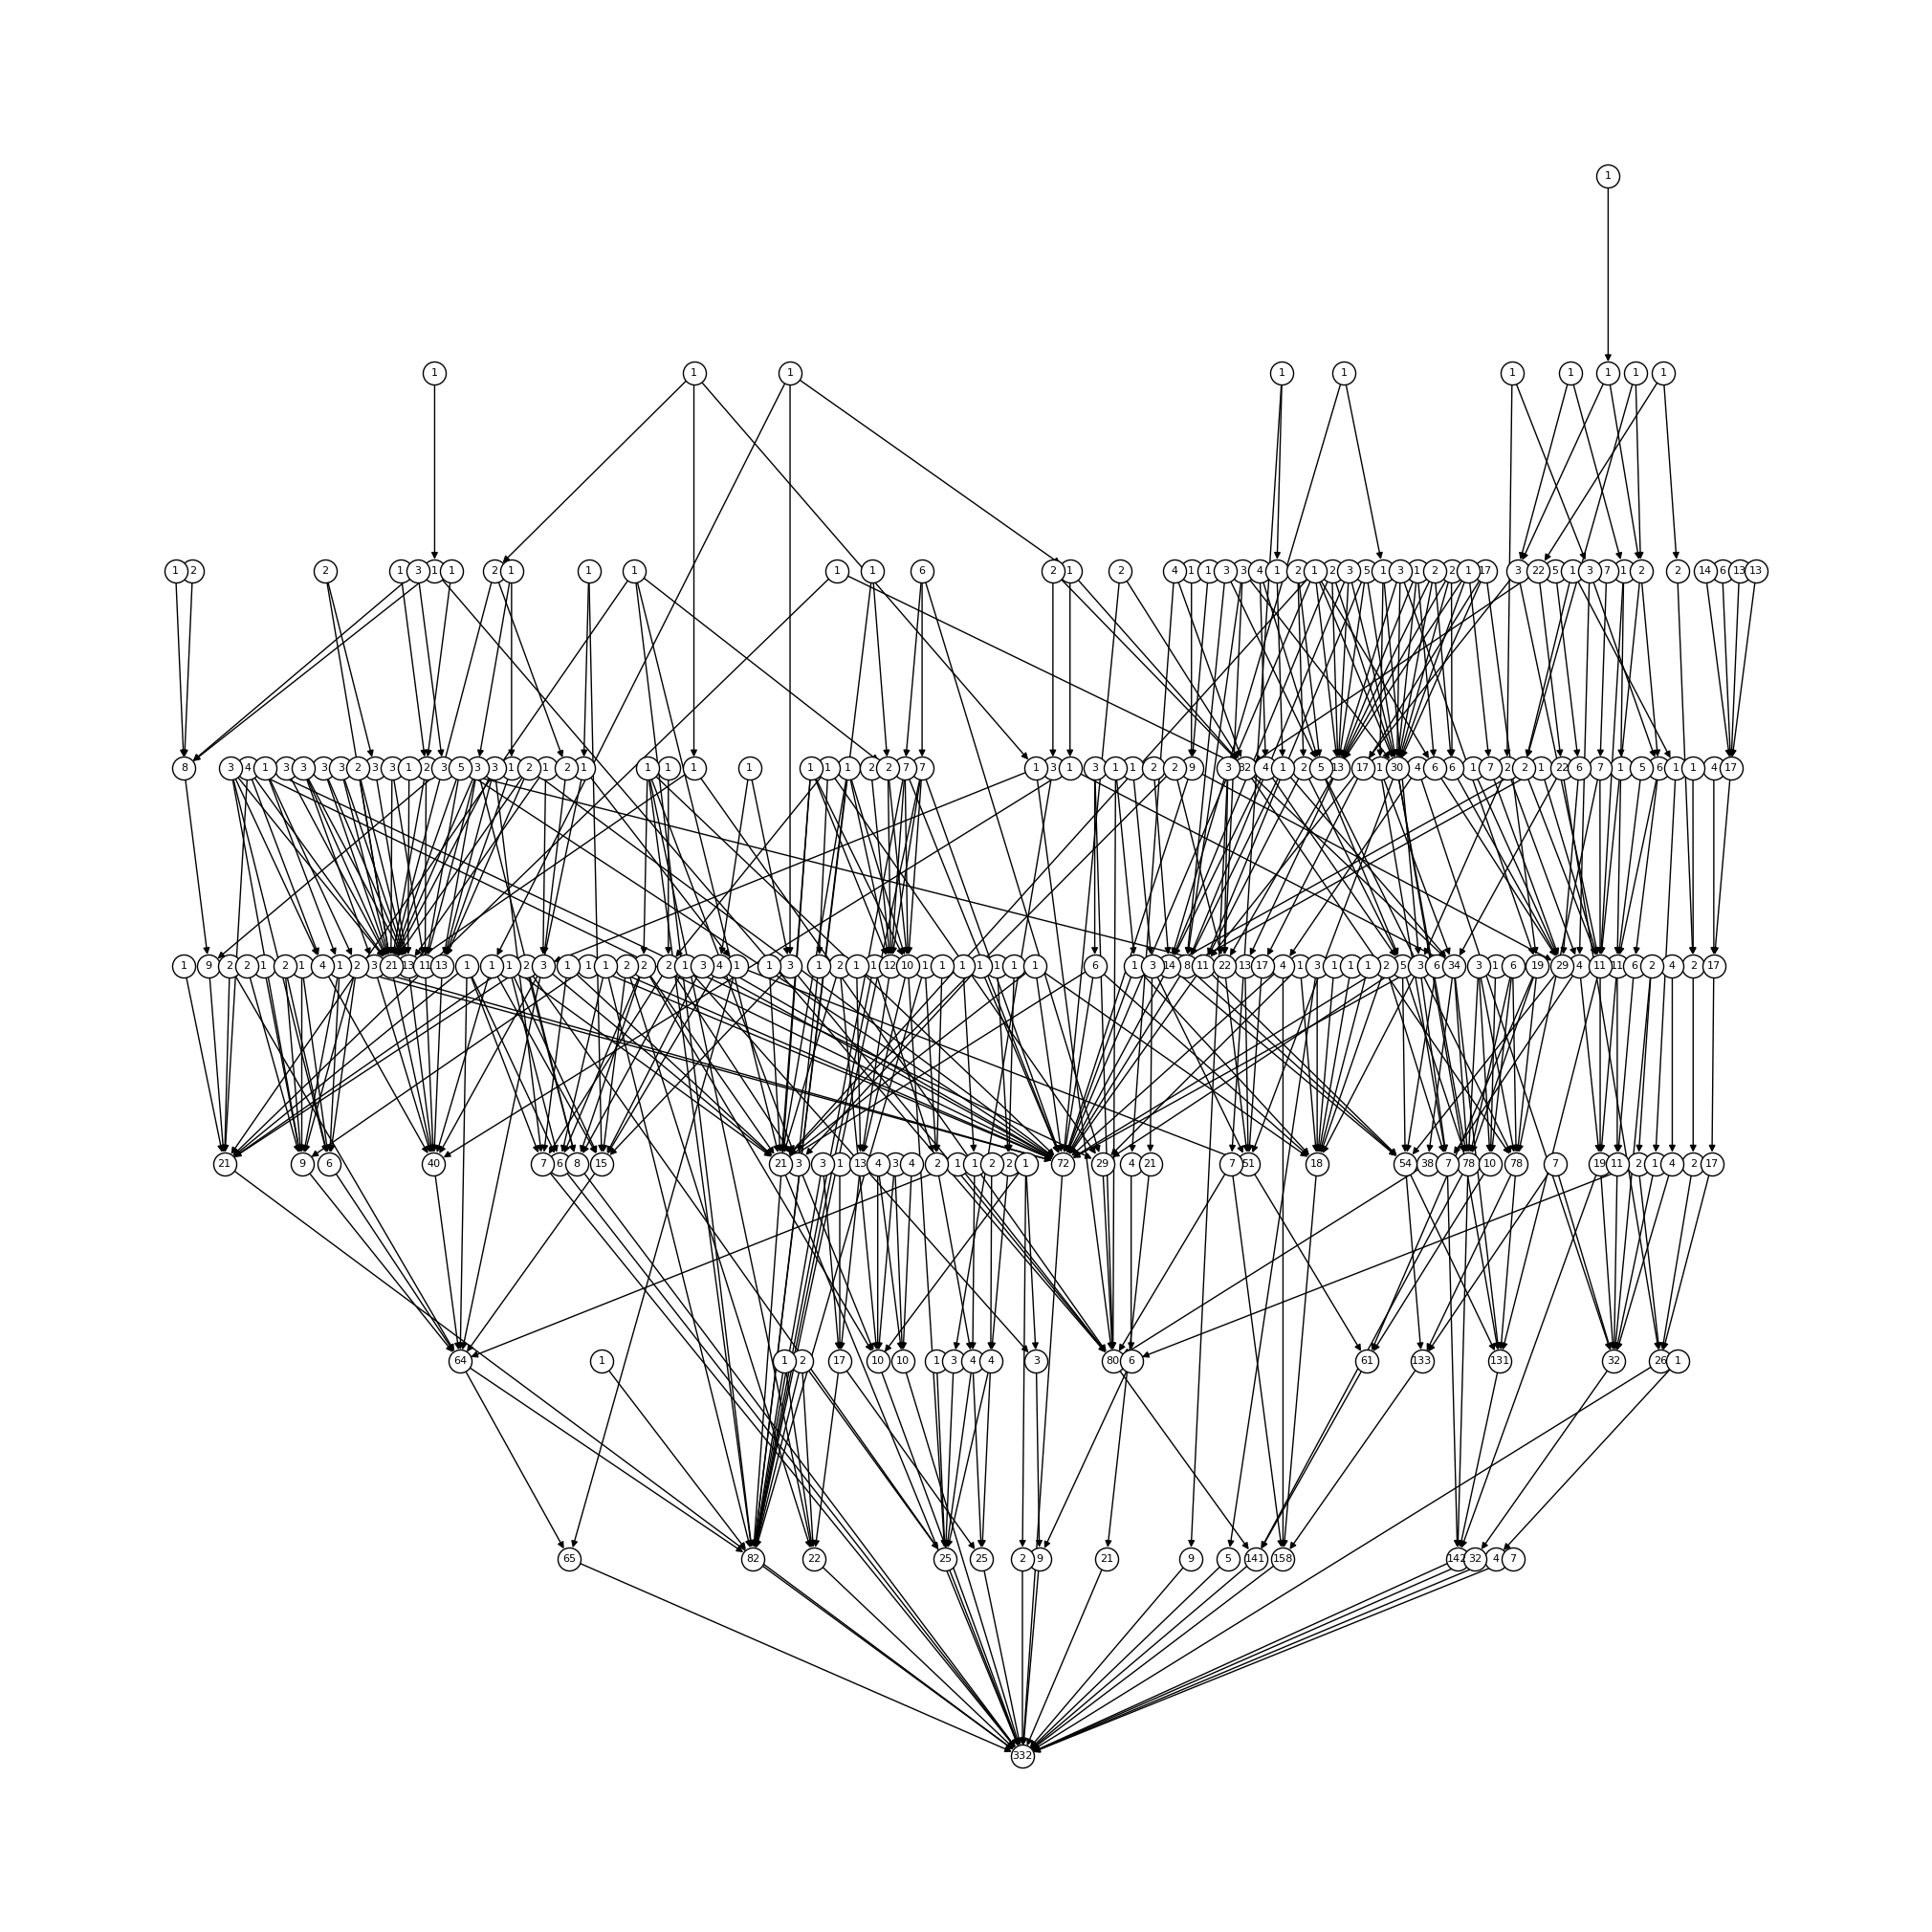

In [53]:
graph_plot(df_uniprot_goa=df_uniprot_goa, min_samples_per_term=0, method="numbers")

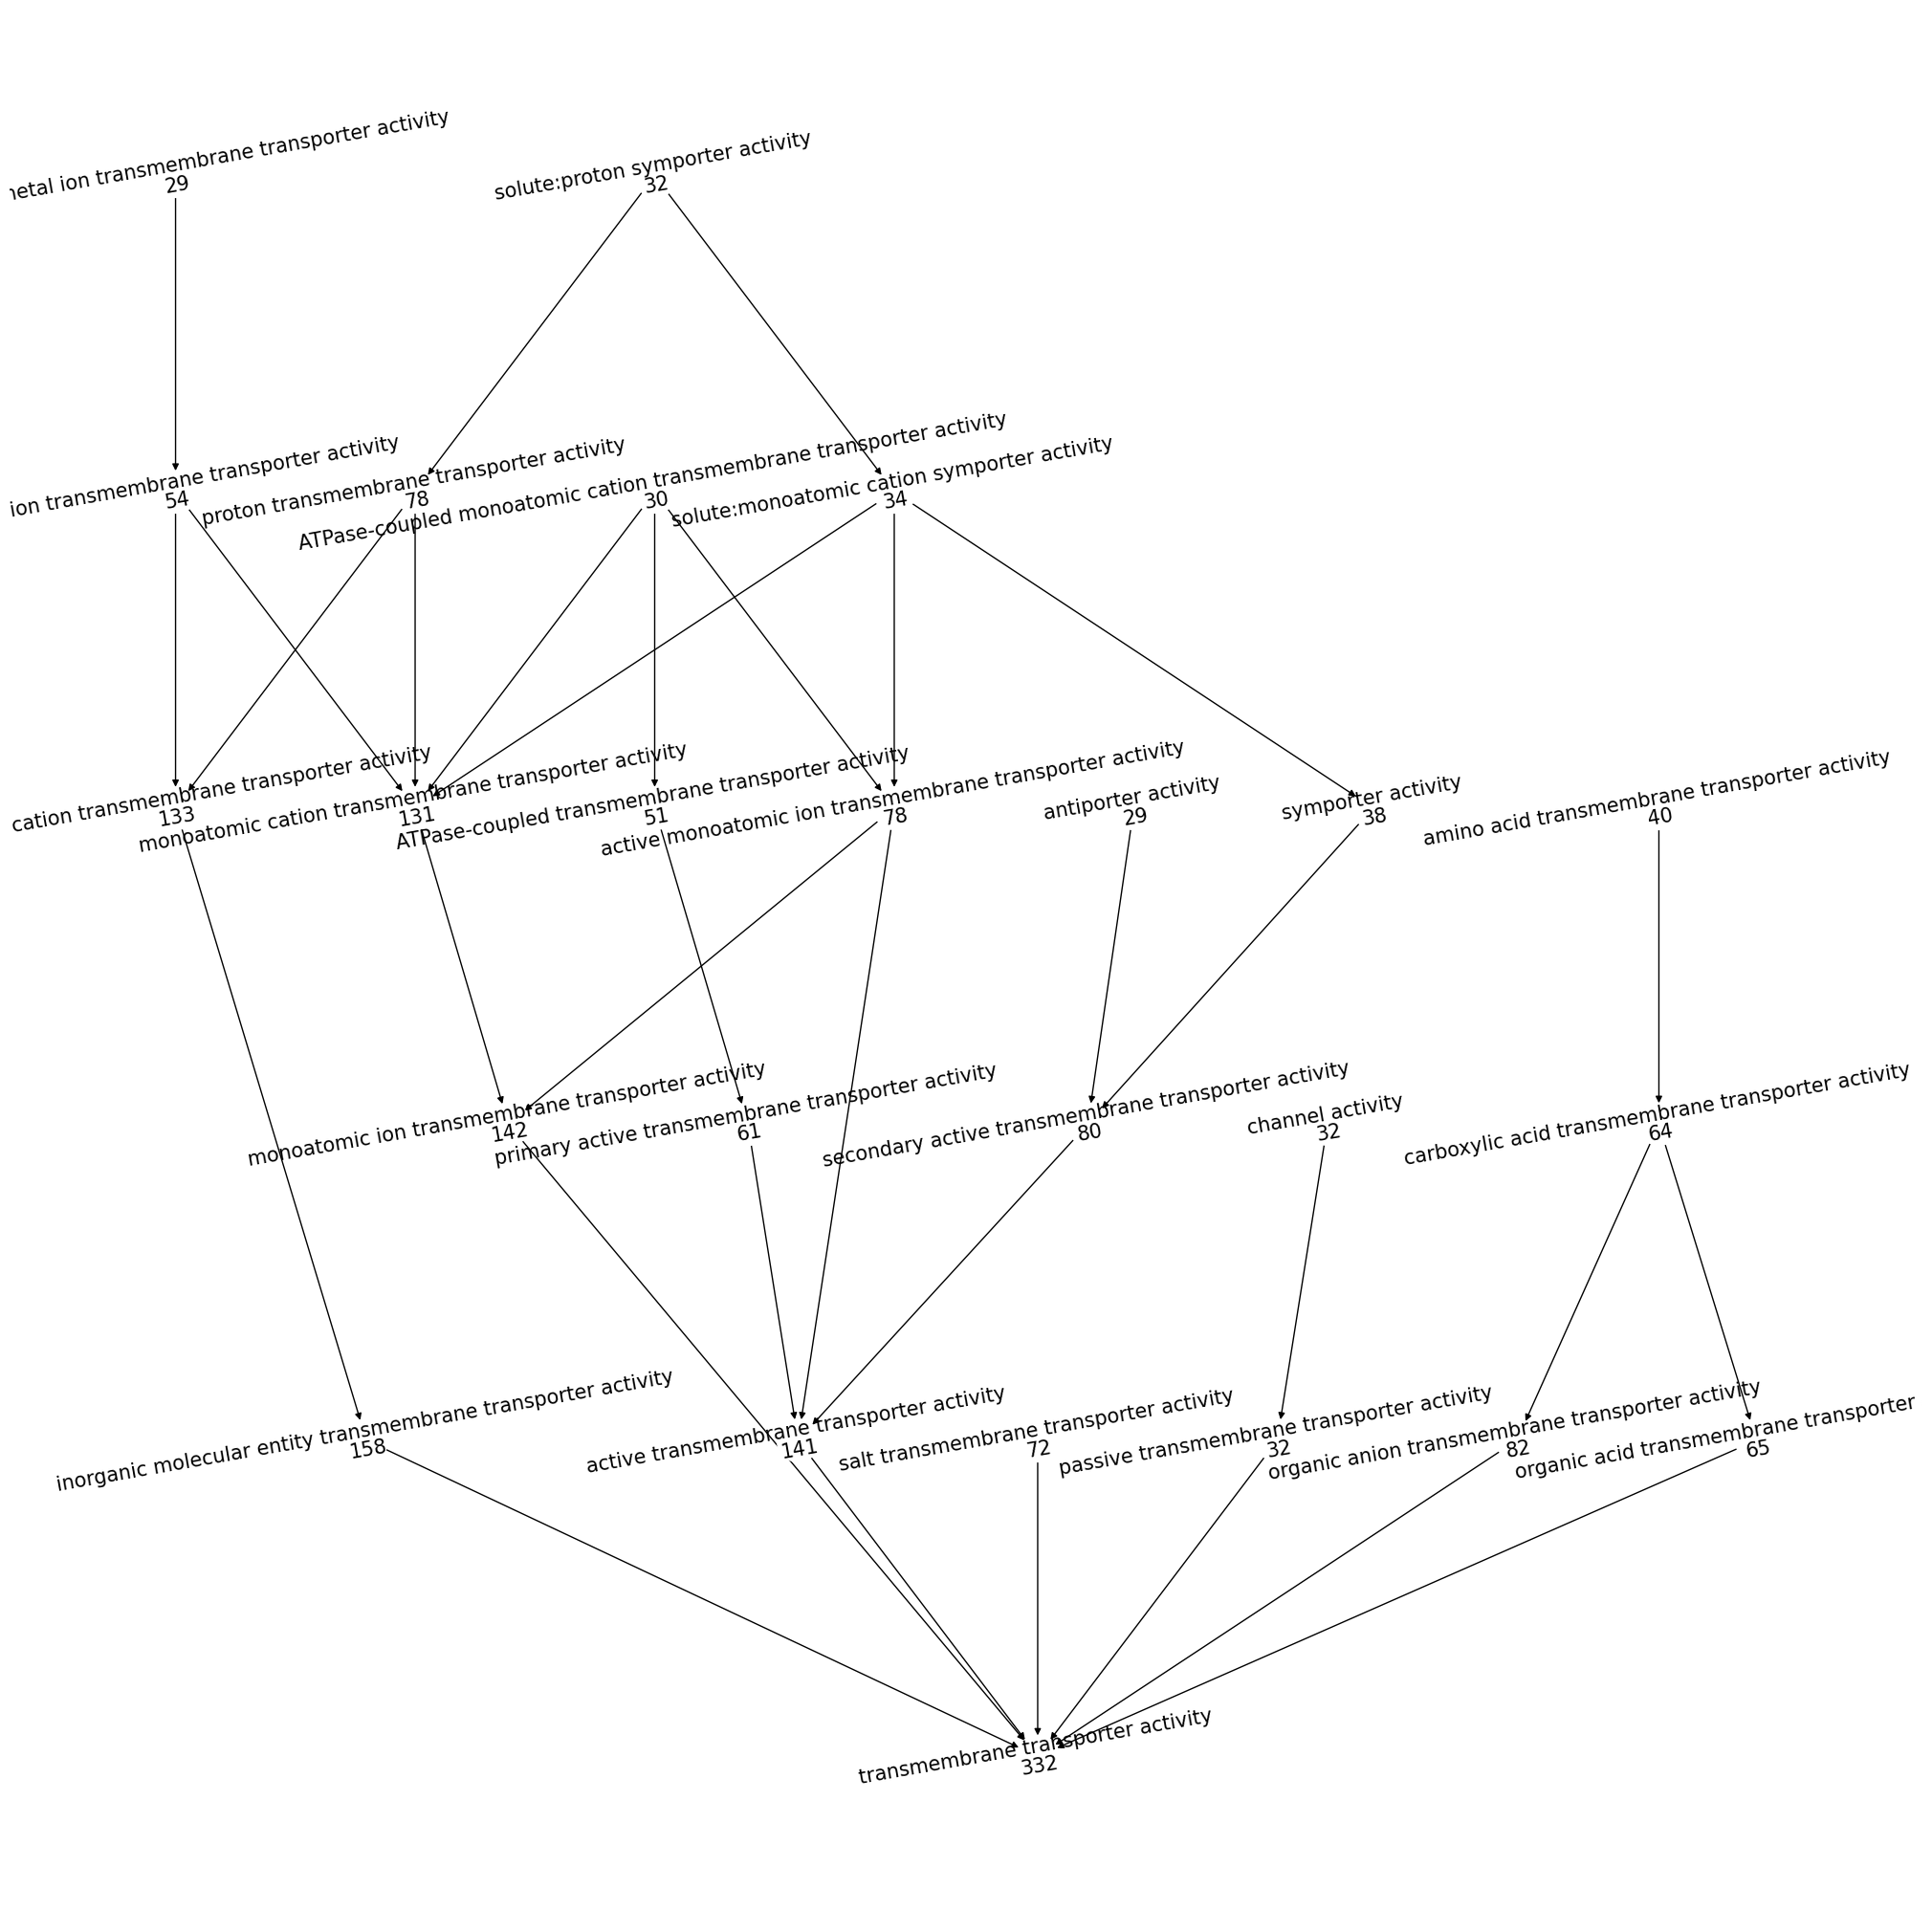

In [54]:
graph_plot(df_uniprot_goa=df_uniprot_goa, min_samples_per_term=29, method="labels")

Text(0.5, 1.0, 'Protein annotations of transporter GO terms\nmean 11.455, std 29.208')

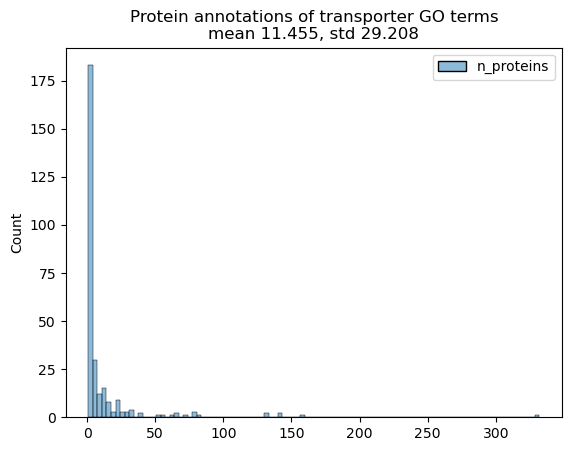

In [55]:
import seaborn as sns
df_counts = (
    df_uniprot_goa[["go_id_ancestor", "Uniprot"]]
    .drop_duplicates()
    .groupby("go_id_ancestor")
    .apply(len)
    .rename("n_proteins").to_frame()
)
ax = sns.histplot(
    df_counts, bins=100
)

ax.set_title("Protein annotations of transporter GO terms\nmean 11.455, std 29.208")